In [60]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Grades.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [61]:
df["CGPA"].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

# Note1: Regression model will be applied

In [62]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(571, 43)

In [63]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [64]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical Columns:  ['CGPA']




# EDA
1. Null/NaN

In [65]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

### Note2: CS 406 as maximum null values [20%]. Will be evaluated later if need to be dropped.

<Axes: >

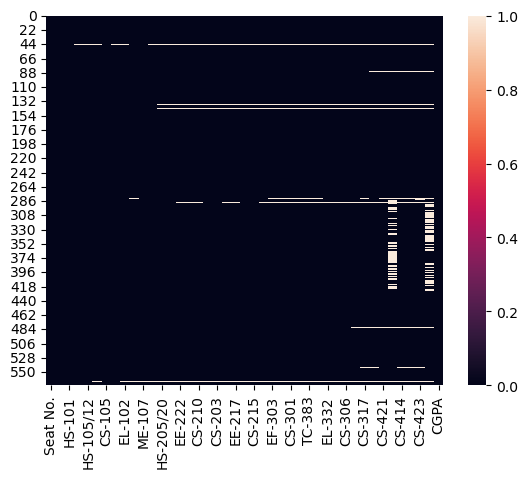

In [66]:
sns.heatmap(df.isnull())

In [67]:
y= ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for x in y:
    df[x]=df[x].fillna(df[x].mode()[0])
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

In [69]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64


PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64


HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64


CY-105
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64


HS-105/12
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64


MT-111
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64


CS-

In [70]:
df.nunique().to_frame("No of unique values")

No of unique values
Seat No.                   571
PH-121                      13
HS-101                      12
CY-105                      13
HS-105/12                   13
MT-111                      13
CS-105                      11
CS-106                      13
EL-102                      13
EE-119                      12
ME-107                      13
CS-107                      14
HS-205/20                   13
MT-222                      14
EE-222                      13
MT-224                      14
CS-210                      14
CS-211                      14
CS-203                      13
CS-214                      13
EE-217                      13
CS-212                      12
CS-215                      14
MT-331                      12
EF-303                      12
HS-304                      14
CS-301                      12
CS-302                      11
TC-383                      12
MT-442                      12
EL-332                      13
CS-318                      14
CS-306                      13
CS-312                      14
CS-317                      12
CS-403                      11
CS-421                      13
CS-406                      14
CS-414                      13
CS-419                      12
CS-423                      12
CS-412                      13
CGPA                       491

### Note3: Seat No. can be dropped as well as it has unique values.

In [71]:
columns_to_drop=["Seat No."]
df = df.drop(columns_to_drop, axis=1)


In [72]:
df.shape

(571, 42)

In [73]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(571, 42)

# 2. Label Encoder

In [74]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     6.0    10.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[571 rows x 42 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [76]:
df.describe() # We donot remove Skewness and Outliars from cataegorial columns.¶

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.898424    4.241681    3.896673    2.838879   
std      3.046895    2.785317    2.964737    3.200507    2.988546    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    4.500000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   12.000000   12.000000   12.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.122592    3.959720    3.886165    4.779335  ...    4.071804   
std      2.727192    3.031436    2.657528    3.146202  ...    3.362345   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    5.000000  ...    3.000000   
75%      5.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     12.000000   12.000000   11.000000   12.000000  ...   13.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.835377    3.432574    5.385289    2.984238    2.397548    3.856392   
std      2.740382    2.980685    2.729063    2.468346    2.499388    2.382769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     3.966725    3.049037    2.954888  
std      2.795475    2.332316    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    2.000000    3.029000  
75%      6.000000    4.000000    3.451000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

In [77]:
##Column count is same: No missing data

##There is no negative/valid _ Dataset is OK

##Median (50%) > Mean - "Nothing found" --> Left Skewed

##Median (50%) < Mean - PH-121,CS-312, -> Right Skewed

##Percentile 75% and max : "Almost in all Columns"- outliars are present

In [78]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

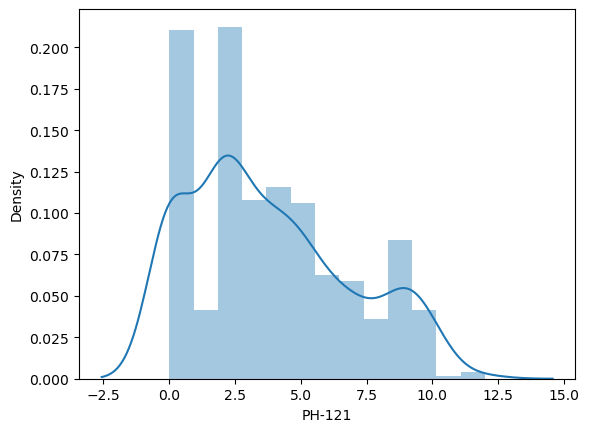

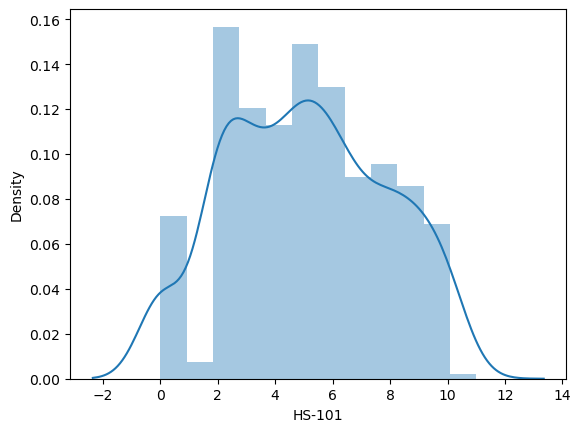

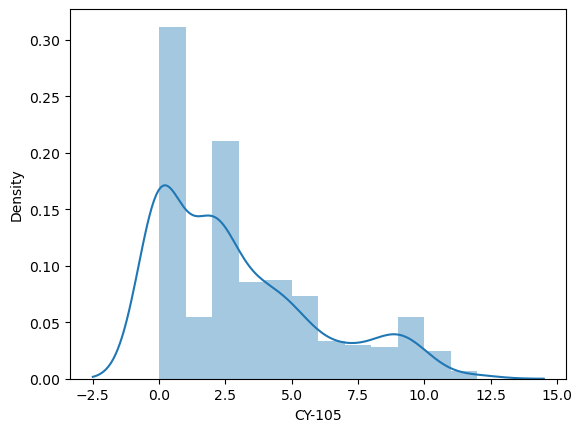

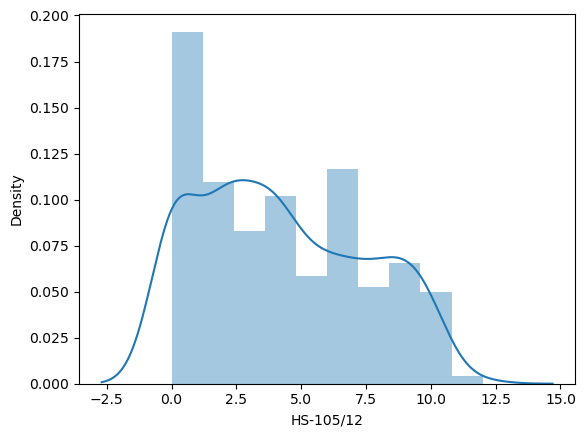

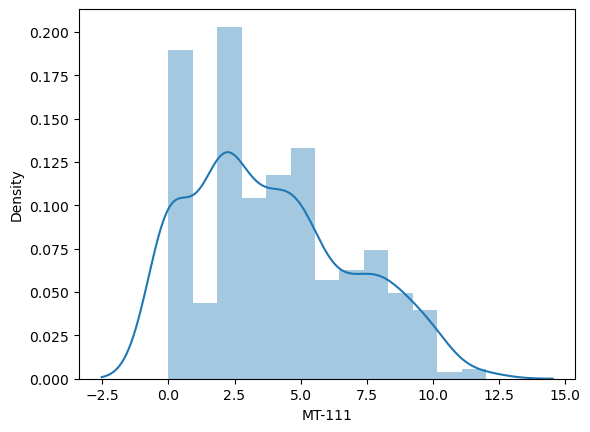

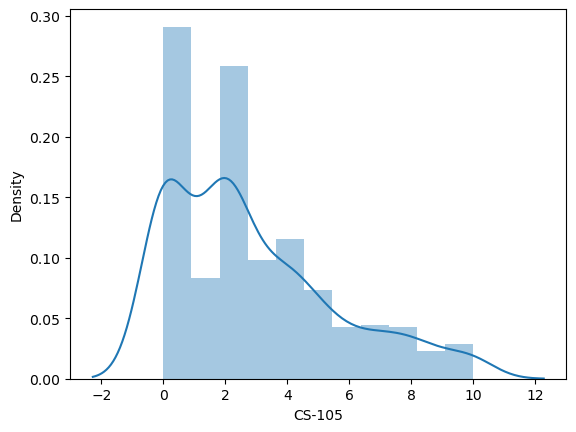

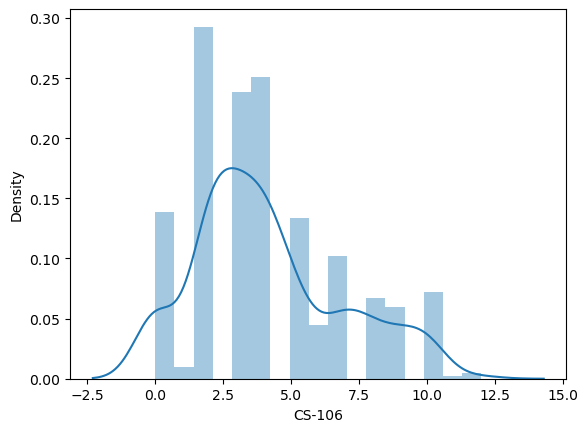

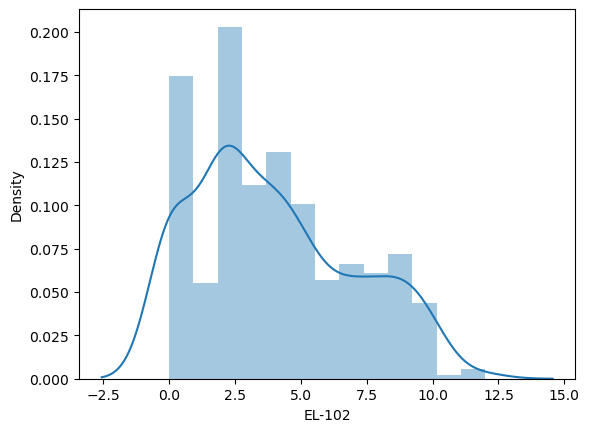

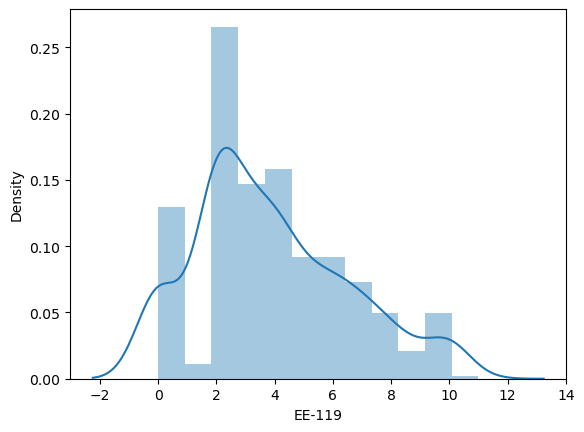

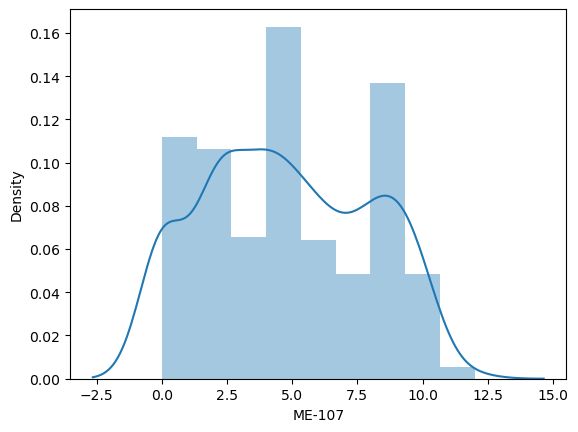

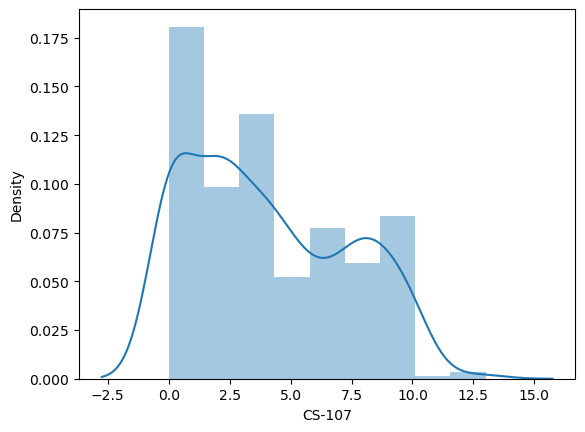

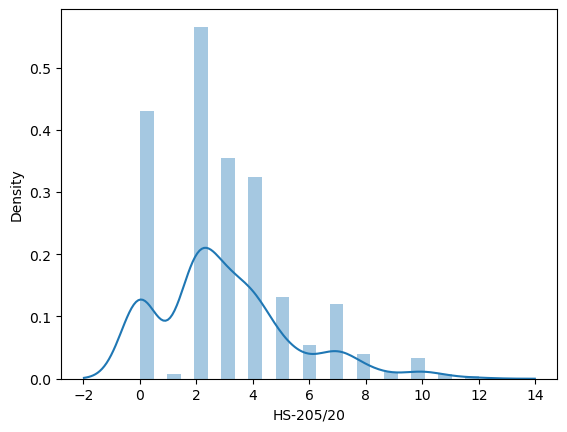

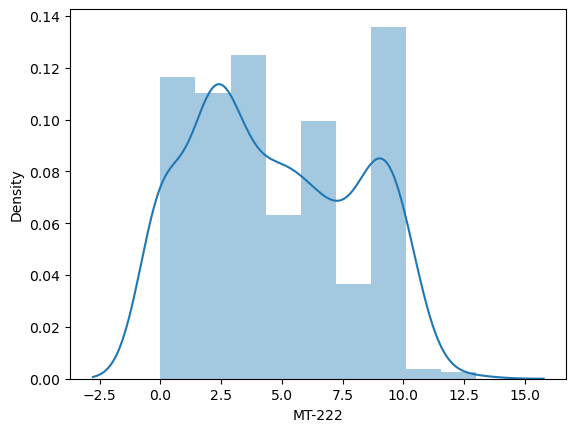

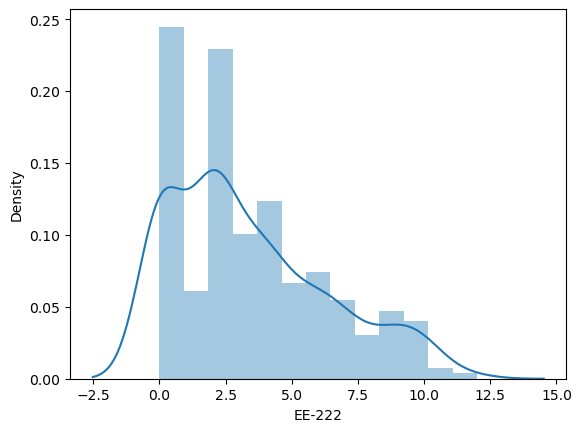

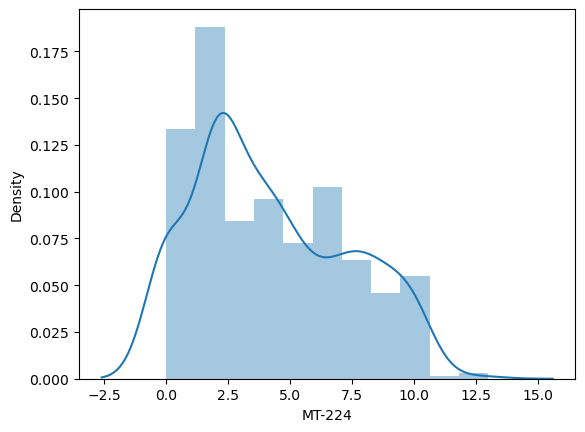

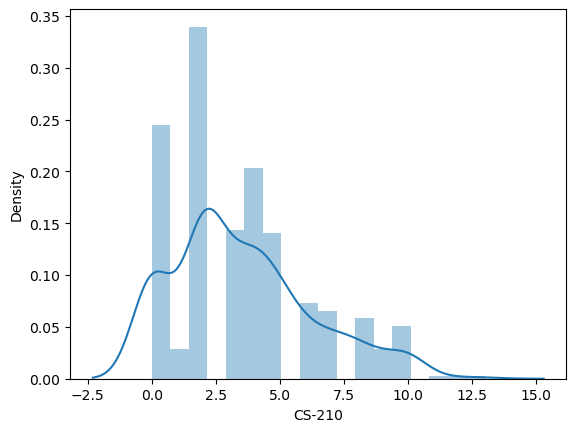

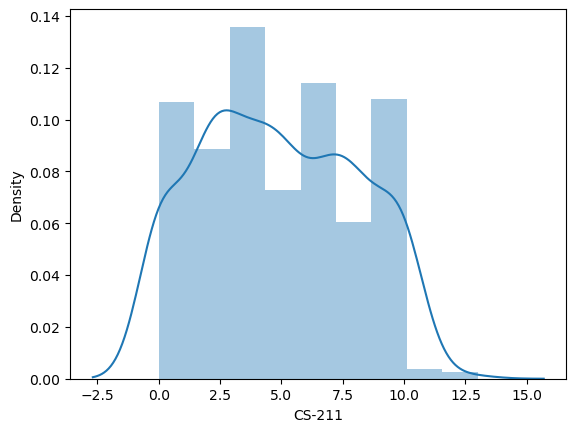

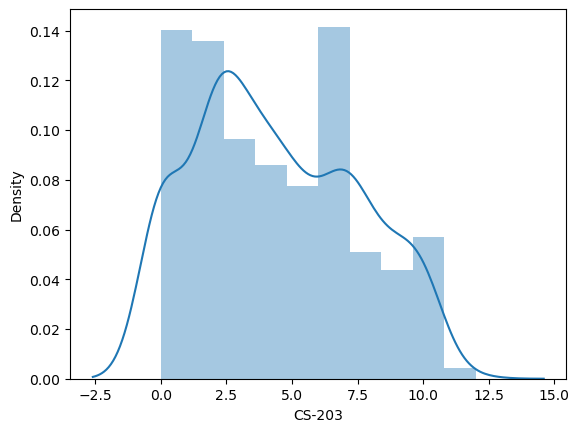

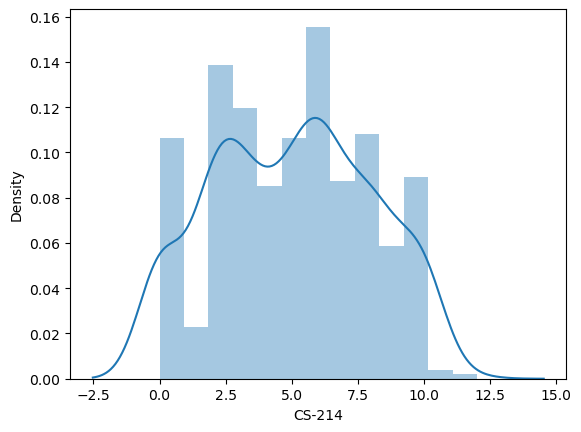

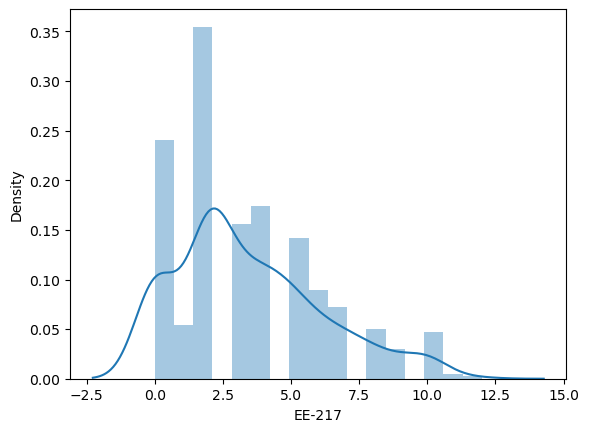

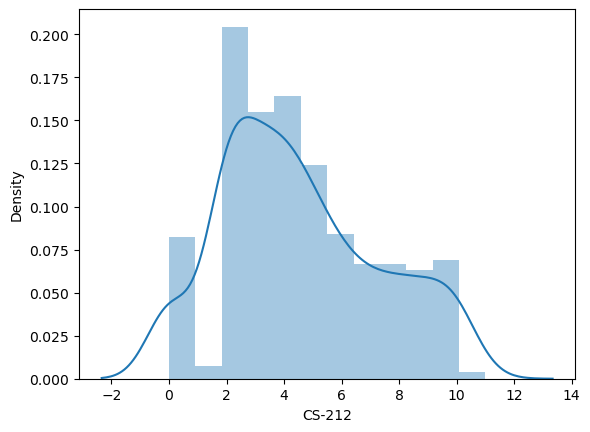

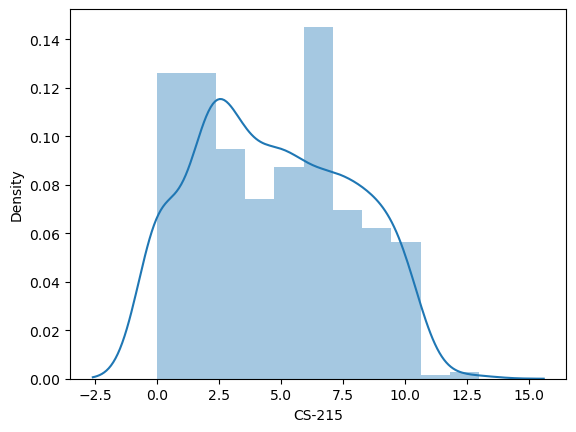

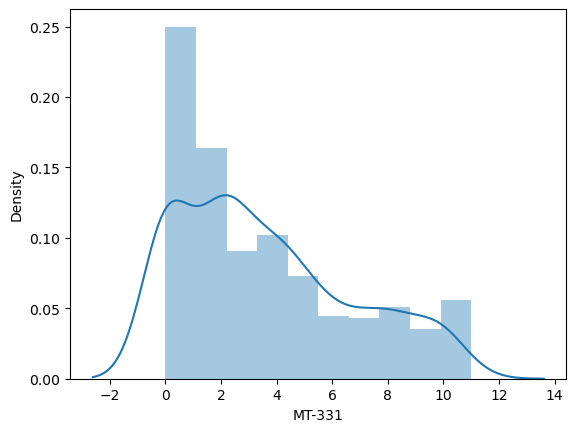

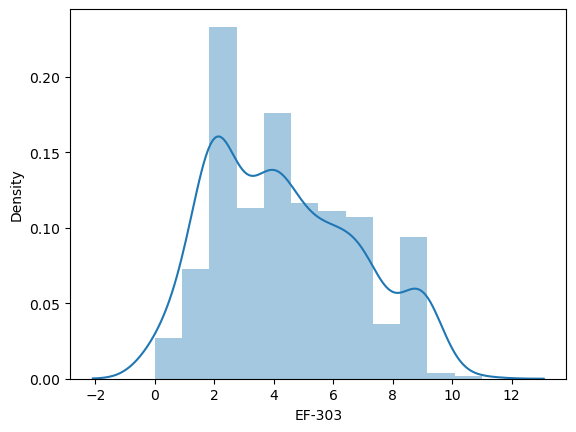

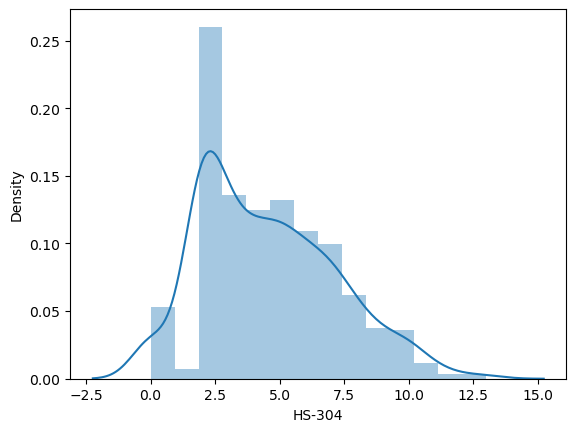

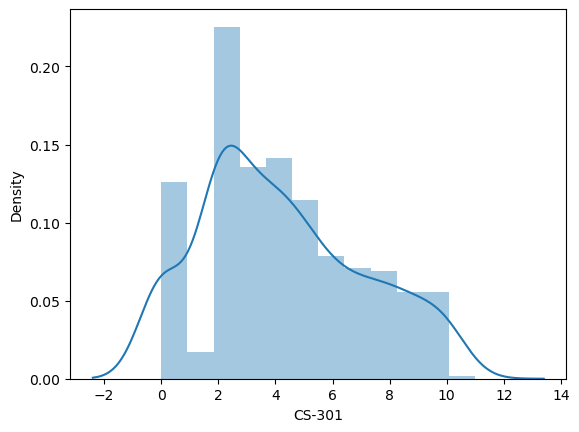

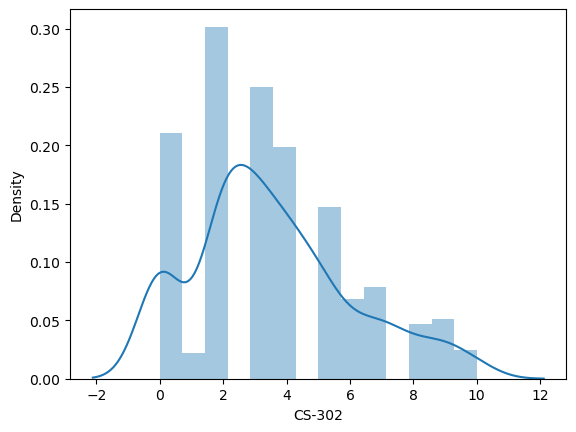

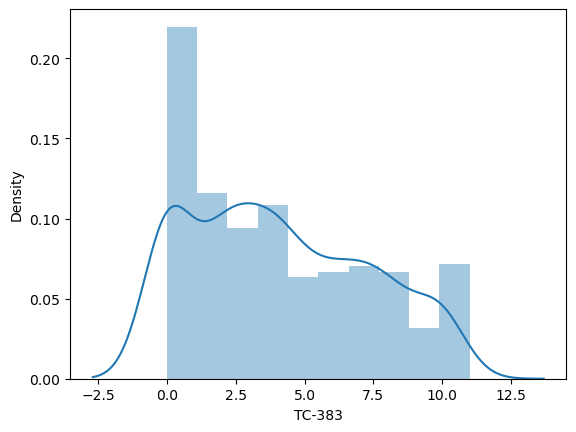

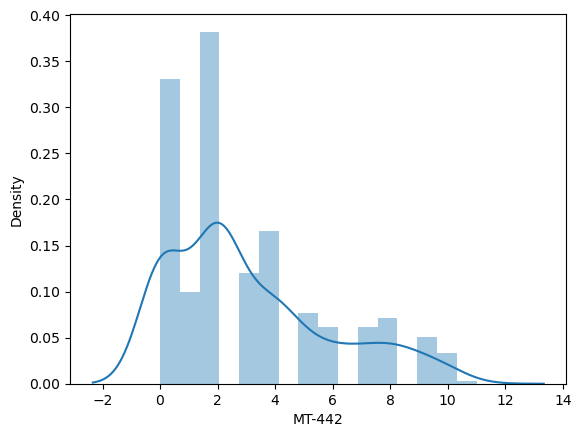

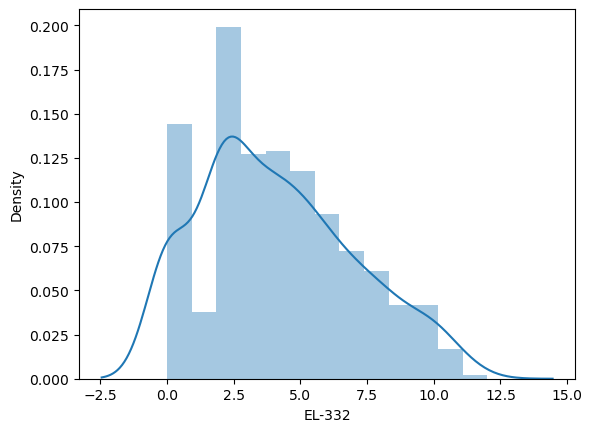

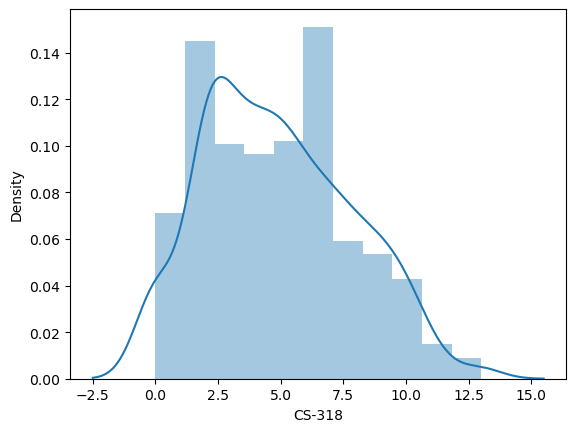

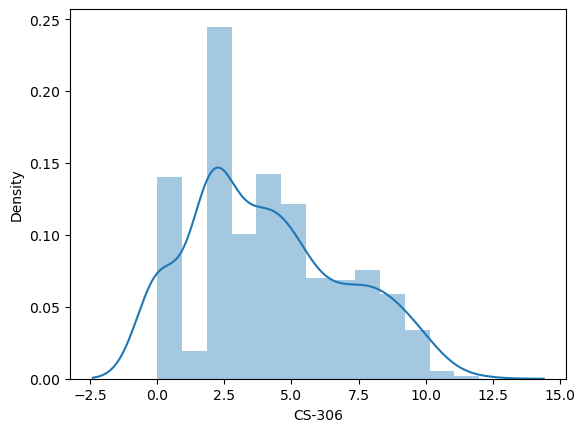

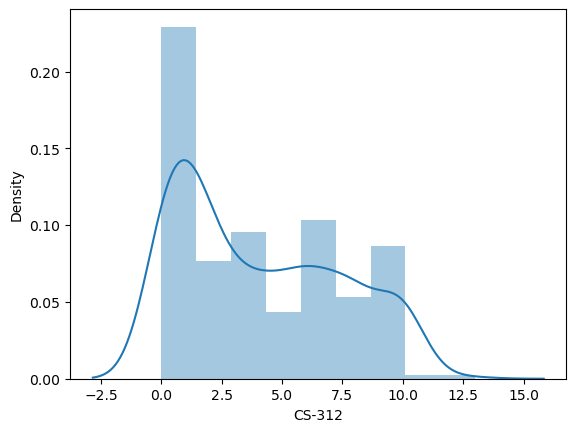

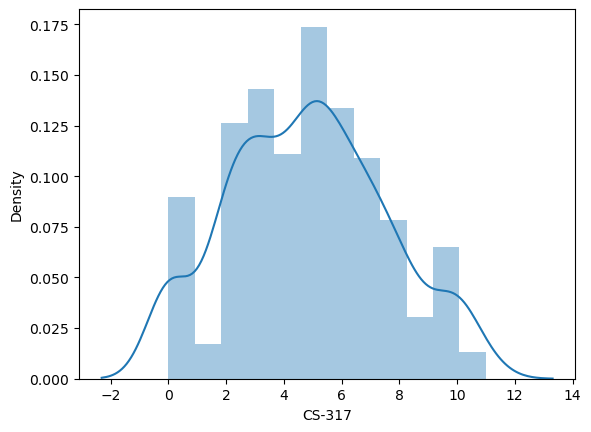

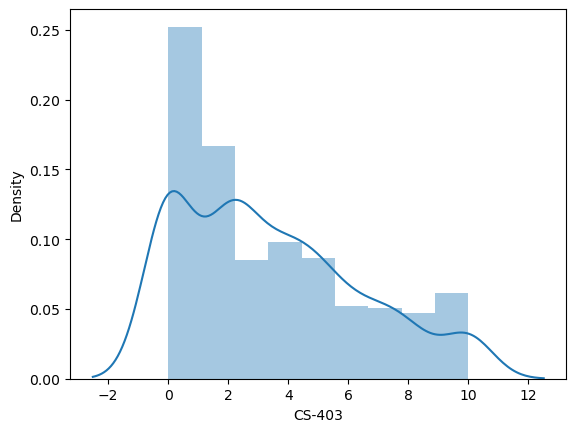

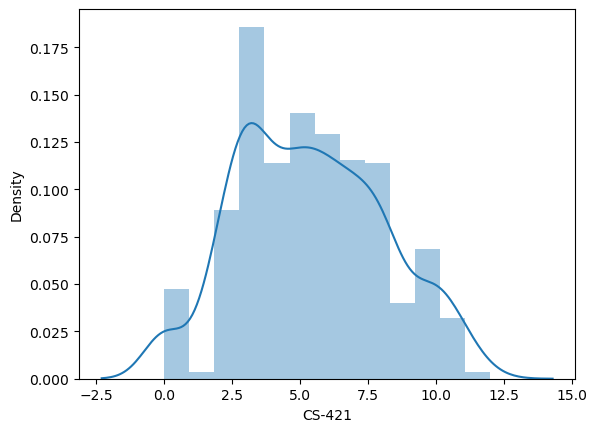

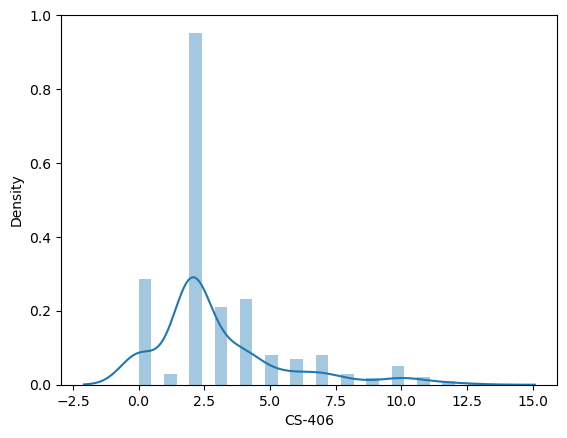

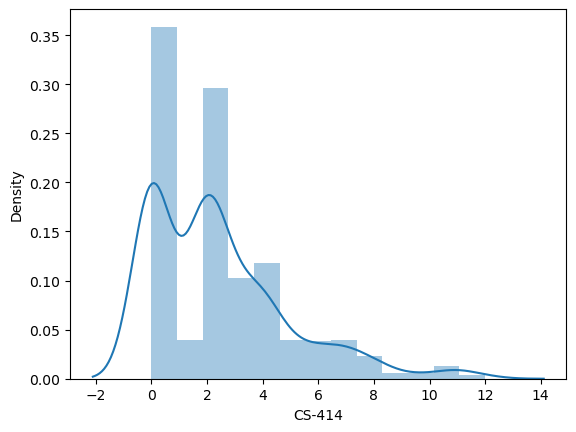

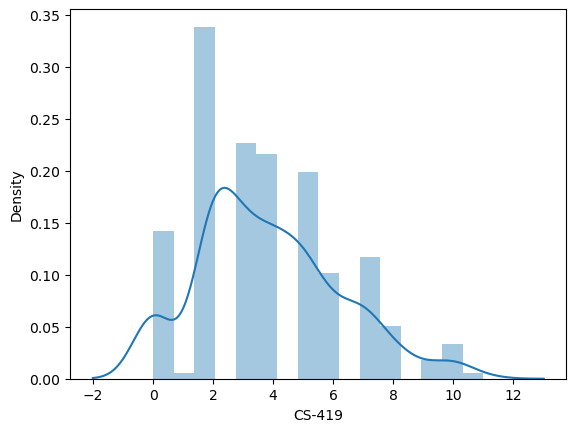

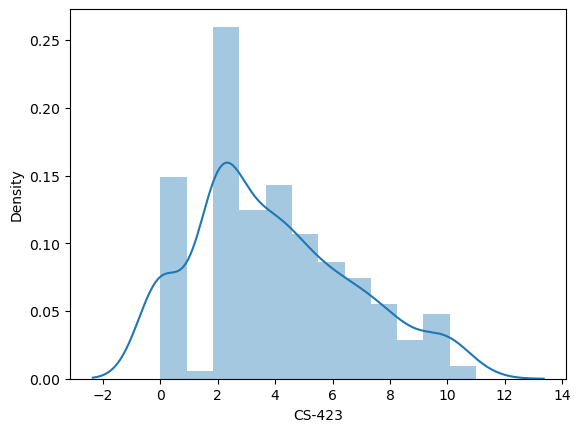

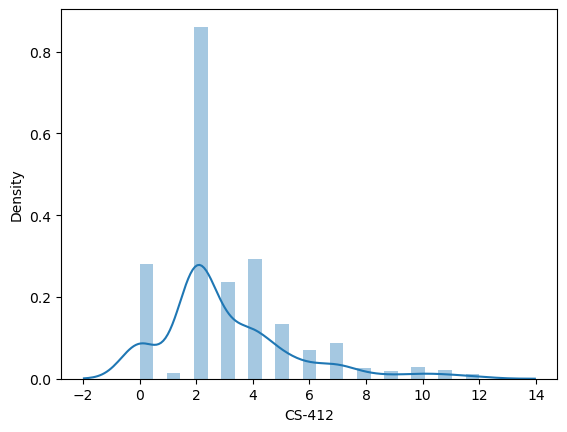

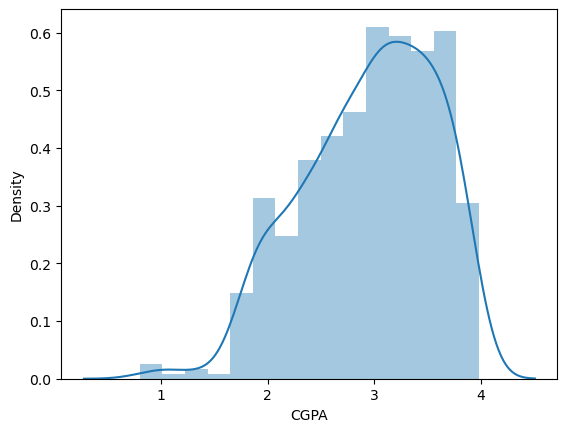

In [79]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

### We donot remove Skewness and Outliars from cataegorial columns.

PH-121          Axes(0.125,0.825775;0.168478x0.0542254)
HS-101       Axes(0.327174,0.825775;0.168478x0.0542254)
CY-105       Axes(0.529348,0.825775;0.168478x0.0542254)
HS-105/12    Axes(0.731522,0.825775;0.168478x0.0542254)
MT-111          Axes(0.125,0.760704;0.168478x0.0542254)
CS-105       Axes(0.327174,0.760704;0.168478x0.0542254)
CS-106       Axes(0.529348,0.760704;0.168478x0.0542254)
EL-102       Axes(0.731522,0.760704;0.168478x0.0542254)
EE-119          Axes(0.125,0.695634;0.168478x0.0542254)
ME-107       Axes(0.327174,0.695634;0.168478x0.0542254)
CS-107       Axes(0.529348,0.695634;0.168478x0.0542254)
HS-205/20    Axes(0.731522,0.695634;0.168478x0.0542254)
MT-222          Axes(0.125,0.630563;0.168478x0.0542254)
EE-222       Axes(0.327174,0.630563;0.168478x0.0542254)
MT-224       Axes(0.529348,0.630563;0.168478x0.0542254)
CS-210       Axes(0.731522,0.630563;0.168478x0.0542254)
CS-211          Axes(0.125,0.565493;0.168478x0.0542254)
CS-203       Axes(0.327174,0.565493;0.168478x0.0

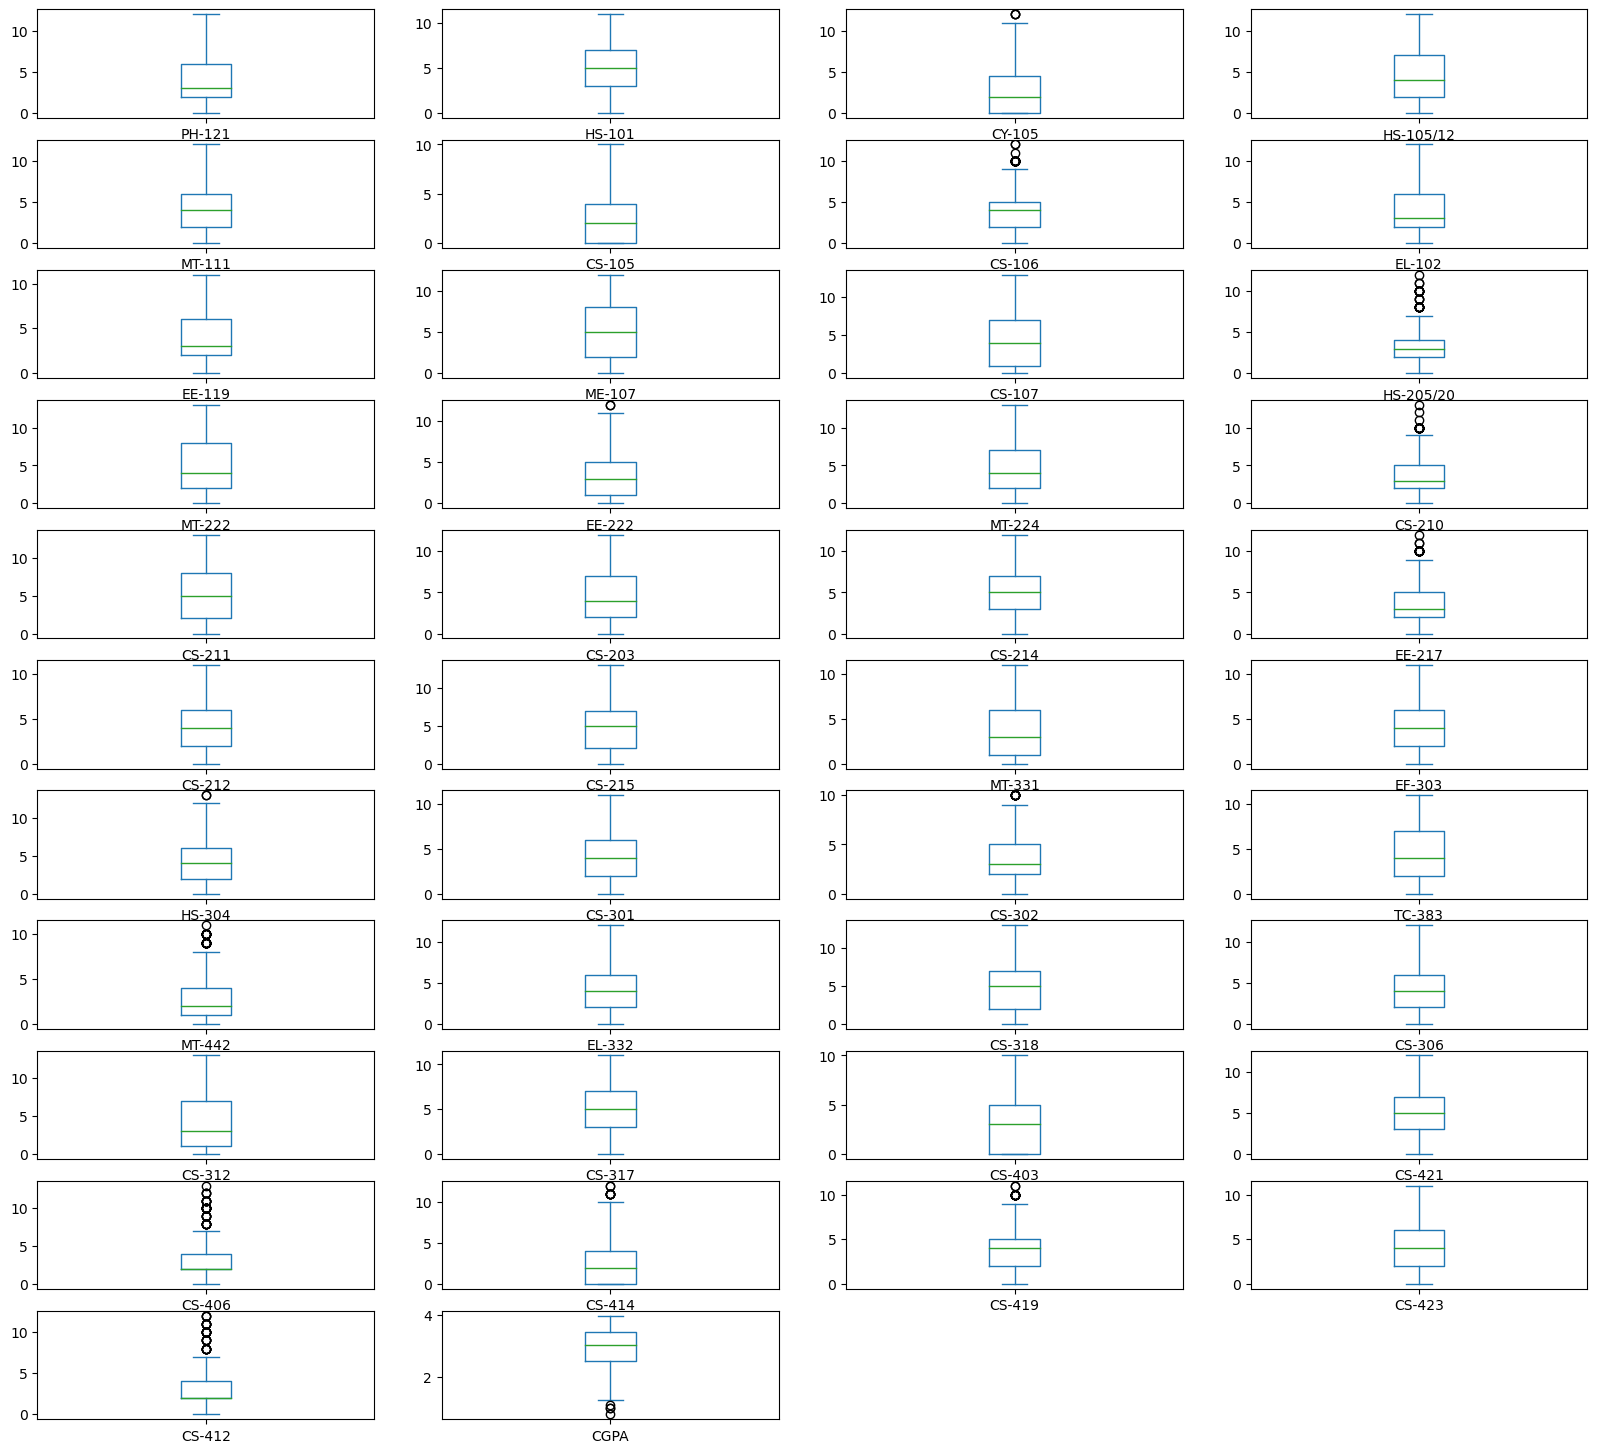

In [80]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

# 4. Co- Relation and Multicolinearity


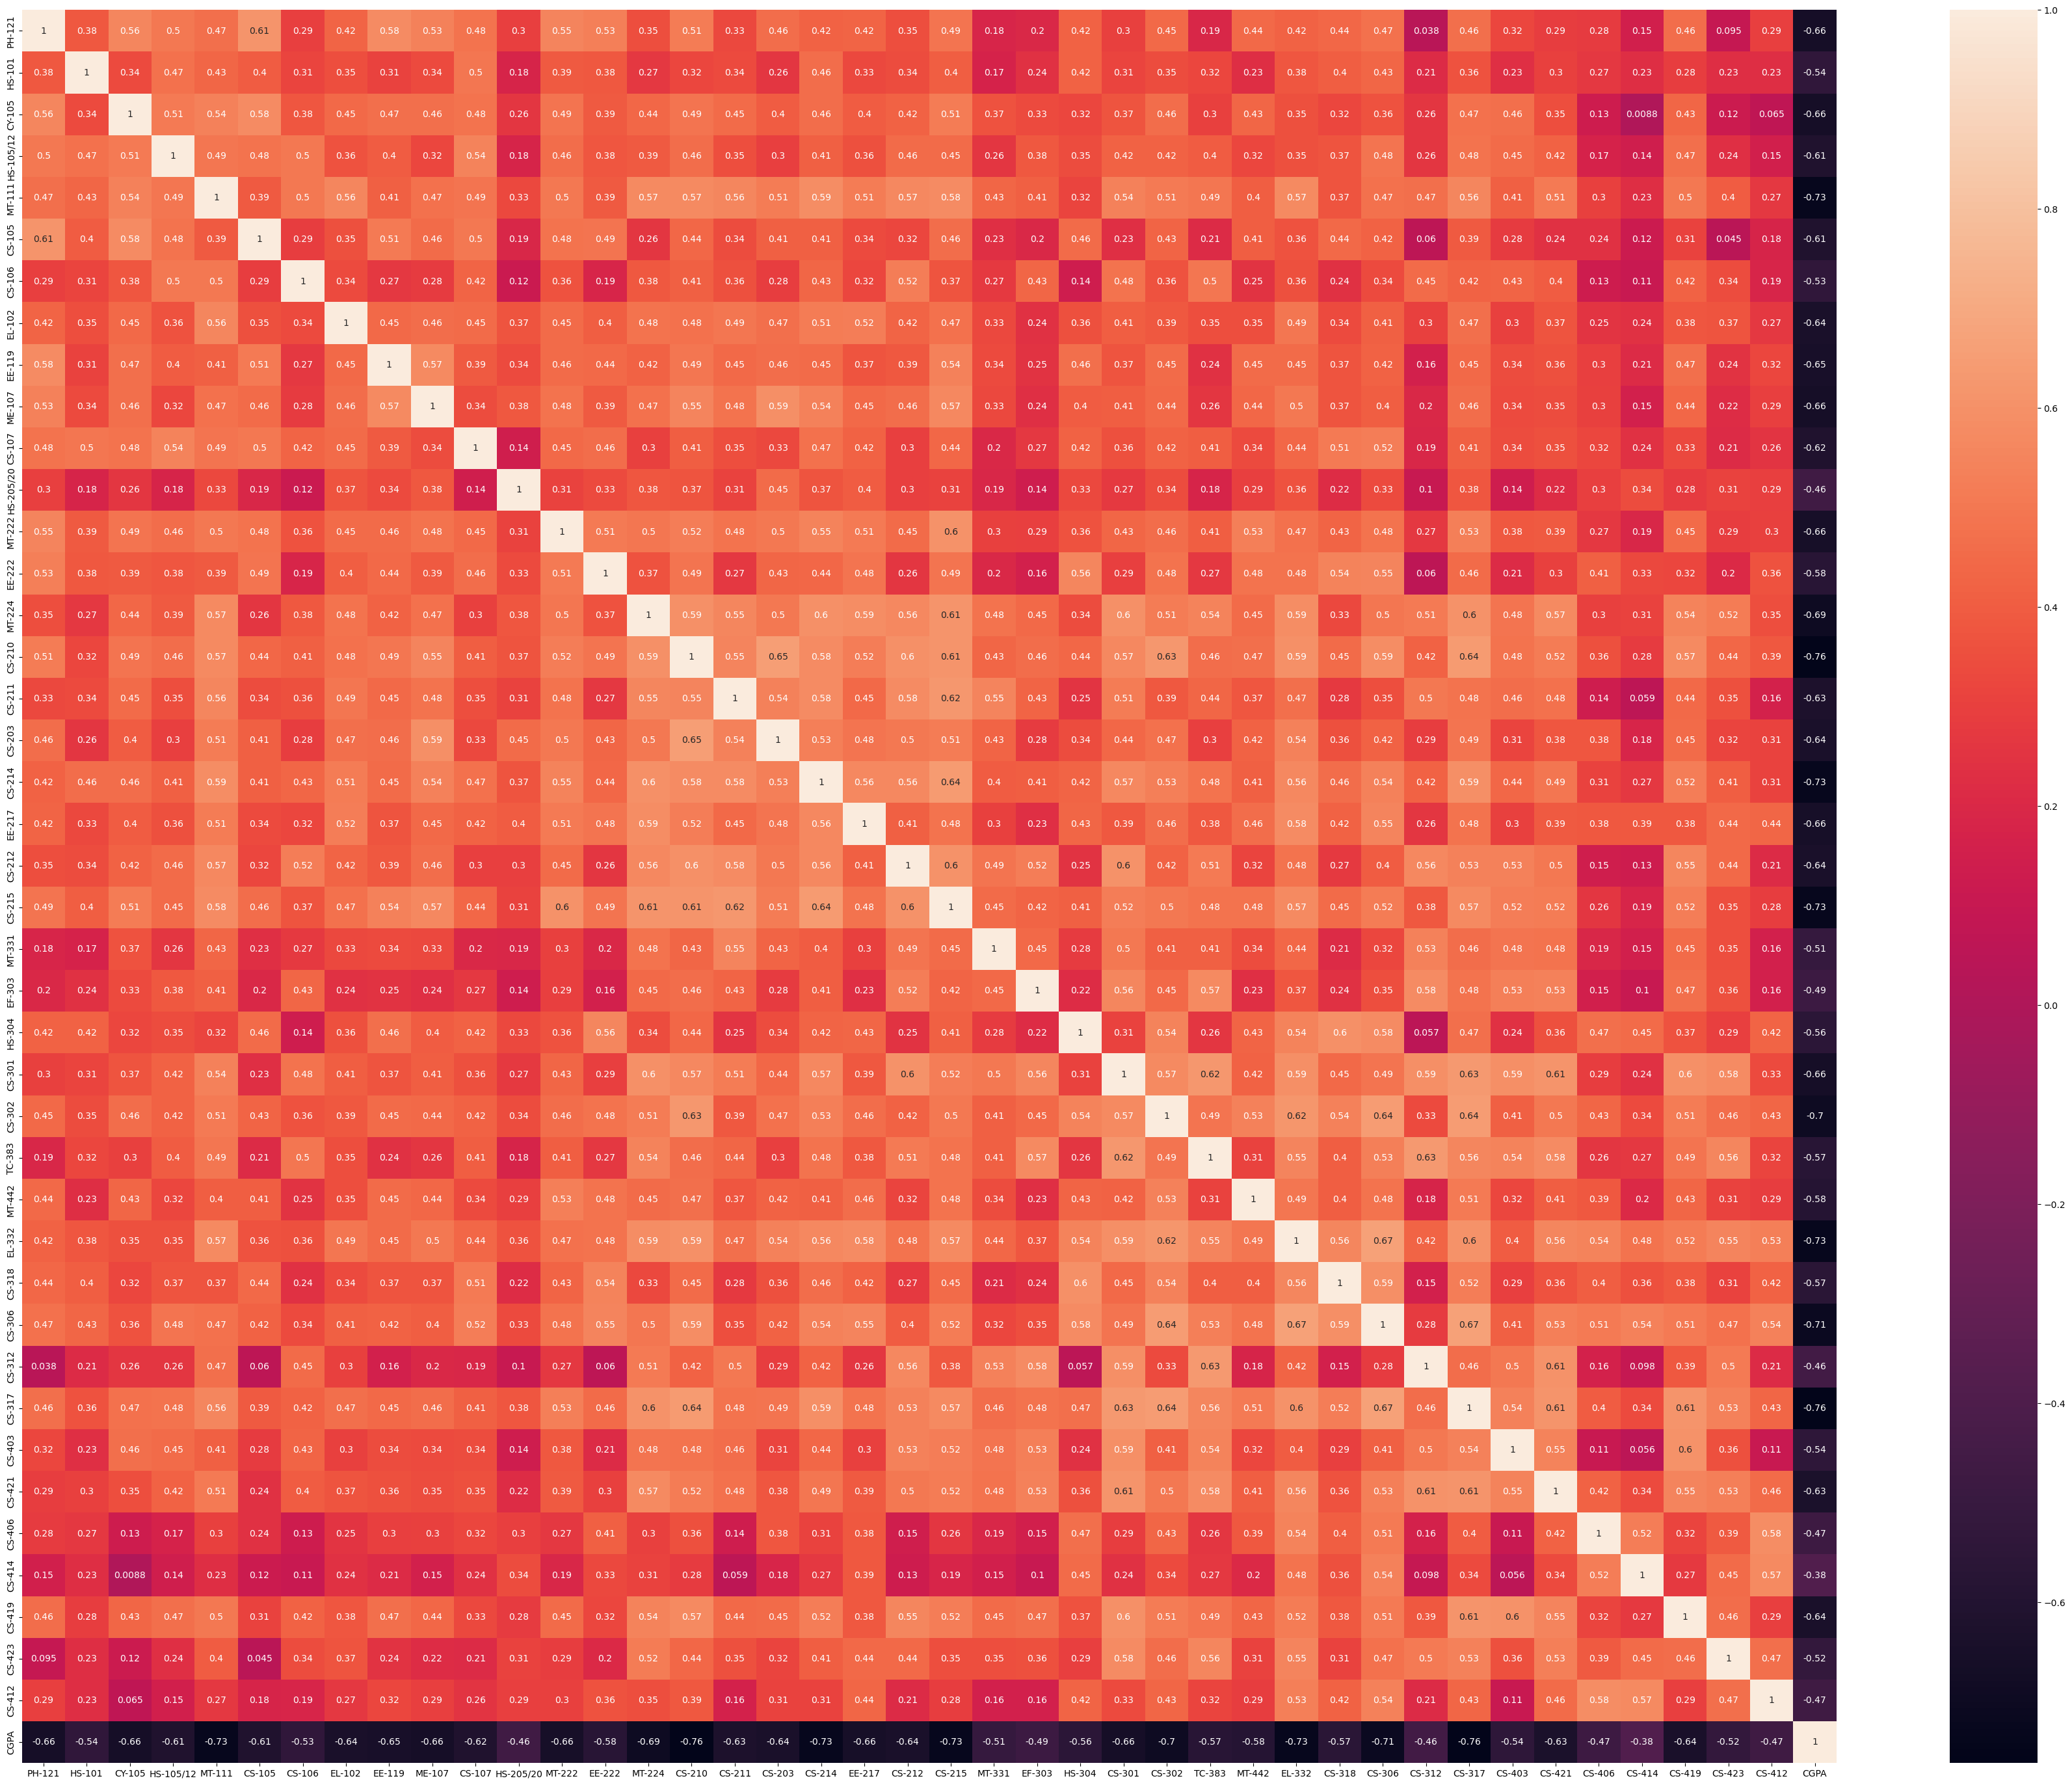

In [42]:
corr_hmap=df.corr()
plt.figure(figsize=(45,35))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [43]:
sns.pairplot(df)

In [44]:
cor=df.corr()
cor
corx = pd.DataFrame(cor)
corx.to_csv("Pr 5- Corr data")

### None of the dataset has very low corelation

In [45]:
cor

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.730095 -0.613169   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.261555  0.472137   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.059711  0.387639   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.450752  0.416562   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.281233  0.461690  0.572964  1.000000 

### Note: Data is with medium or high co-relation.

In [81]:
df.nunique().to_frame("No of unique values")

No of unique values
PH-121                      13
HS-101                      12
CY-105                      13
HS-105/12                   13
MT-111                      13
CS-105                      11
CS-106                      13
EL-102                      13
EE-119                      12
ME-107                      13
CS-107                      14
HS-205/20                   13
MT-222                      14
EE-222                      13
MT-224                      14
CS-210                      14
CS-211                      14
CS-203                      13
CS-214                      13
EE-217                      13
CS-212                      12
CS-215                      14
MT-331                      12
EF-303                      12
HS-304                      14
CS-301                      12
CS-302                      11
TC-383                      12
MT-442                      12
EL-332                      13
CS-318                      14
CS-306                      13
CS-312                      14
CS-317                      12
CS-403                      11
CS-421                      13
CS-406                      14
CS-414                      13
CS-419                      12
CS-423                      12
CS-412                      13
CGPA                       491

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor   features
0     7.186020     PH-121
1     7.216553     HS-101
2     4.901557     CY-105
3     6.319539  HS-105/12
4     7.045277     MT-111
5     4.986303     CS-105
6     6.090601     CS-106
7     5.328668     EL-102
8     6.871729     EE-119
9     7.531717     ME-107
10    6.015541     CS-107
11    4.164178  HS-205/20
12    6.917284     MT-222
13    5.159140     EE-222
14    8.109806     MT-224
15    7.957425     CS-210
16    8.818168     CS-211
17    7.928625     CS-203
18   10.212911     CS-214
19    6.441621     EE-217
20   10.183904     CS-212
21   10.024615     CS-215
22    4.842517     MT-331
23    8.144962     EF-303
24    9.550895     HS-304
25    9.835638     CS-301
26    8.193846     CS-302
27    7.622994     TC-383
28    4.500446     MT-442
29    9.744613     EL-332
30    8.456632     CS-318
31   10.632539     CS-306
32    7.998359     CS-312
33   12.998889     CS-317
34    5.806260     CS-403
35   13.078386     CS-421
36    5.337957     CS-406
37    4.4077

# MODEL
1. Feature Scaling using Standard Scalarization

In [83]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.374222  2.657832  1.790004   
1   -1.242052  1.411559  2.397448   1.488043  0.369509  1.173242  1.790004   
2   -1.242052 -0.744483 -0.978490   0.237145  0.034605 -1.053643  0.322008   
3    1.714365  0.692879  2.397448   1.488043  1.709126 -0.311348  2.157003   
4   -0.585070 -1.103823 -0.303302  -0.075580 -1.305012 -1.053643 -0.778989   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.256579 -1.822504 -0.978490  -0.701029 -0.970108 -1.053643 -0.778989   
567 -0.913561 -1.822504 -0.978490  -1.326478 -1.305012 -1.053643 -1.512987   
568 -0.256579 -1.822504 -0.303302  -0.075580 -1.305012 -1.053643 -1.512987   
569 -1.242052 -0.385142  2.059854  -1.326478  1.709126  2.657832  0.322008   
570  0.728893  1.411559  2.059854   0.549869  0.704413  2.657832 -0.411990   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.333963  0.419492  1.024565  ...  0.663660  1.169315  1.155824   
1   -1.307365  2.302589  1.342687  ...  1.715324  1.764660  1.521056   
2    0.013299 -0.710366 -0.884168  ... -0.738559 -0.319046 -0.670339   
3    1.333963  1.925970  0.706443  ...  1.364769  1.764660  0.425358   
4    0.013299 -1.463605 -0.884168  ... -0.738559  0.276298 -0.305107   
..        ...       ...       ...  ...       ...       ...       ...   
566 -0.647033 -1.086986 -0.247924  ... -0.037450 -0.616719 -1.035572   
567 -0.647033 -1.463605 -1.520412  ... -0.738559 -0.021374 -0.305107   
568 -1.307365 -1.463605 -0.566046  ... -0.037450 -0.616719 -0.670339   
569  1.333963  0.419492  1.024565  ... -0.037450  1.466987 -0.670339   
570  1.003797  0.796111  1.660810  ...  2.065879  0.871643  0.425358   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.533685  0.958939 -0.399094 -0.960095  1.740513 -0.346121 -0.450178  
1    0.862110  1.325686 -0.399094  1.042149  0.900418  0.727983 -0.021043  
2   -1.152616  0.225444 -1.210063 -0.960095 -1.619869 -0.704156 -1.308446  
3    2.205260  0.958939  0.817361  0.241251  1.320466  1.086017  1.695494  
4    0.190534 -0.141304 -0.399094 -0.960095 -0.779774 -0.704156 -1.308446  
..        ...       ...       ...       ...       ...       ...       ...  
566 -1.152616 -1.975041 -1.210063  0.641700  0.060322 -0.346121 -1.308446  
567 -1.152616 -1.975041 -0.399094  0.241251 -0.779774  0.727983 -0.450178  
568 -1.152616 -0.508051 -1.210063  1.442597  0.060322 -0.704156 -0.450178  
569 -0.145253  0.958939  2.439300  1.442597 -0.359726  0.369948  1.266360  
570  0.526322  1.325686  3.250269  2.243495  0.060322  1.802087  2.124628  

[571 rows x 41 columns]

# 2. Best random state value:

In [84]:
y.unique() # Will apply regression model

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.964349472616924  at random state  72


# 3. Creating train test split

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# 4. Classification Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  0.964349472616924
R2_score_Training Data:   LinearRegression()  is  91.39022616556755
error:
Mean Absolute error 0.0893834077440857
Mean Squared error 0.013741931476875264
Root Mean Squared error 0.11722598464877684


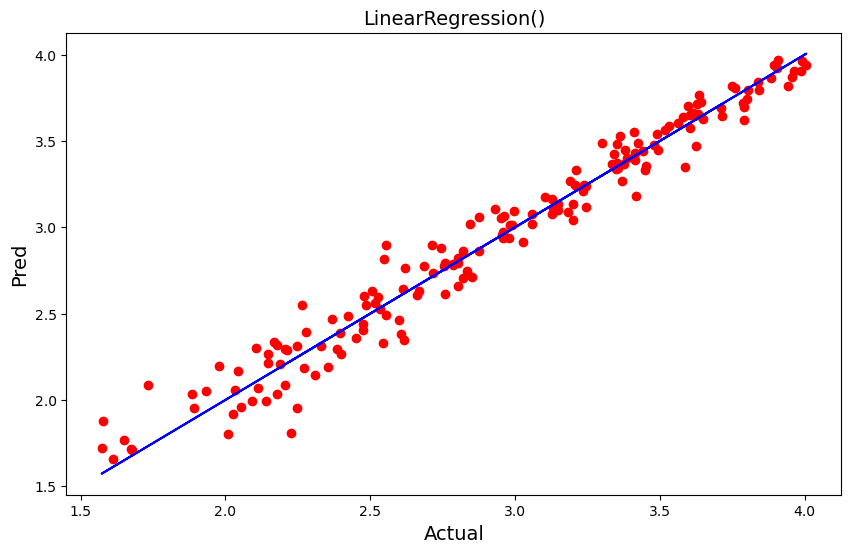

Cross Validation of:   LinearRegression()  is 
[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626616
Diff in Acc Score and Cross Val Score is -  6.089811005426249


R2_score:   RandomForestRegressor()  is  0.9407685322226468
R2_score_Training Data:   RandomForestRegressor()  is  98.52541612947824
error:
Mean Absolute error 0.10848726744186038
Mean Squared error 0.022831493142441834
Root Mean Squared error 0.1511009369343613


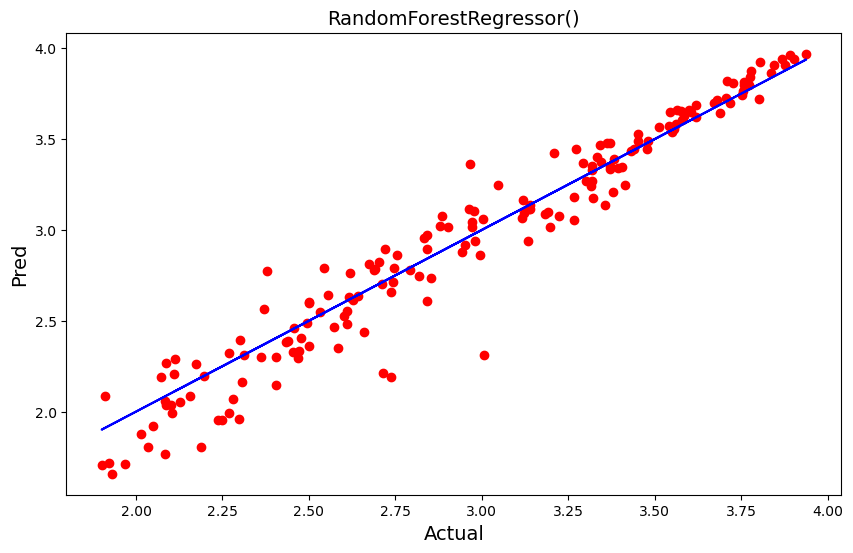

Cross Validation of:   RandomForestRegressor()  is 
[0.90324389 0.92395287 0.94399262 0.91631268 0.84489316]
0.9064790438505115
Diff in Acc Score and Cross Val Score is -  3.42894883721353


R2_score:   DecisionTreeRegressor()  is  0.8805744424495378
R2_score_Training Data:   DecisionTreeRegressor()  is  100.0
error:
Mean Absolute error 0.16497093023255813
Mean Squared error 0.046034040697674423
Root Mean Squared error 0.21455544900485382


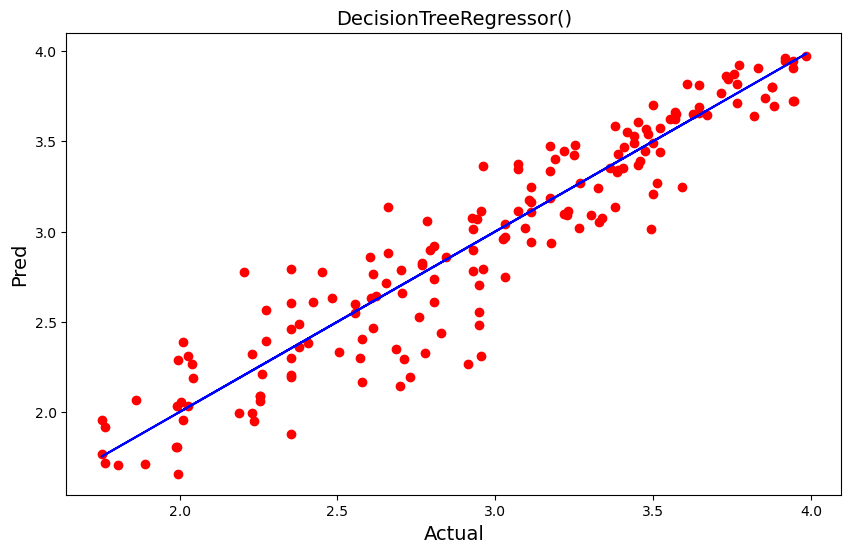

Cross Validation of:   DecisionTreeRegressor()  is 
[0.81053152 0.78801623 0.87280121 0.71589674 0.73024841]
0.7834988236642385
Diff in Acc Score and Cross Val Score is -  9.707561878529924


R2_score:   KNeighborsRegressor()  is  0.9717167269517839
R2_score_Training Data:   KNeighborsRegressor()  is  91.67450579640872
error:
Mean Absolute error 0.08034767441860463
Mean Squared error 0.01090213325581395
Root Mean Squared error 0.10441328103174399


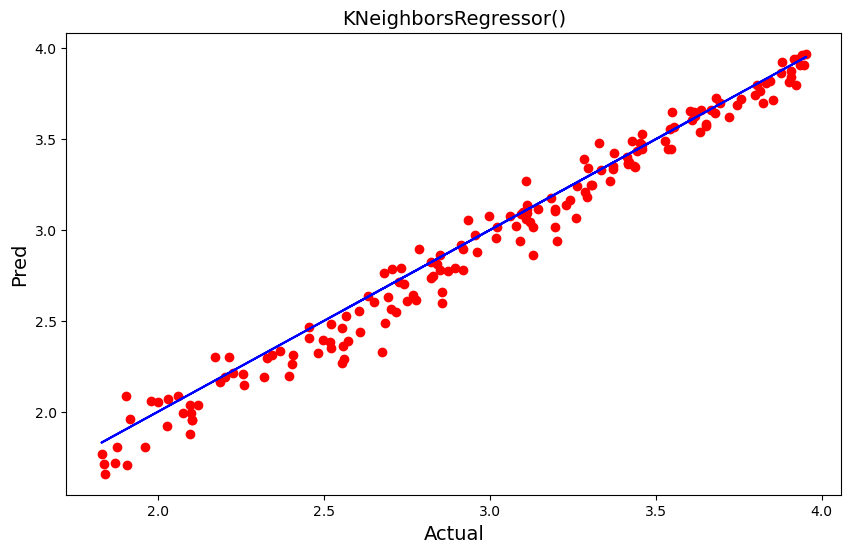

Cross Validation of:   KNeighborsRegressor()  is 
[0.88957963 0.9359176  0.8654431  0.96068931 0.80762497]
0.891850920275352
Diff in Acc Score and Cross Val Score is -  7.986580667643195


R2_score:   Lasso()  is  -0.002069645787602381
R2_score_Training Data:   Lasso()  is  0.0
error:
Mean Absolute error 0.5310373025587224
Mean Squared error 0.3862599915985248
Root Mean Squared error 0.6214981831015476


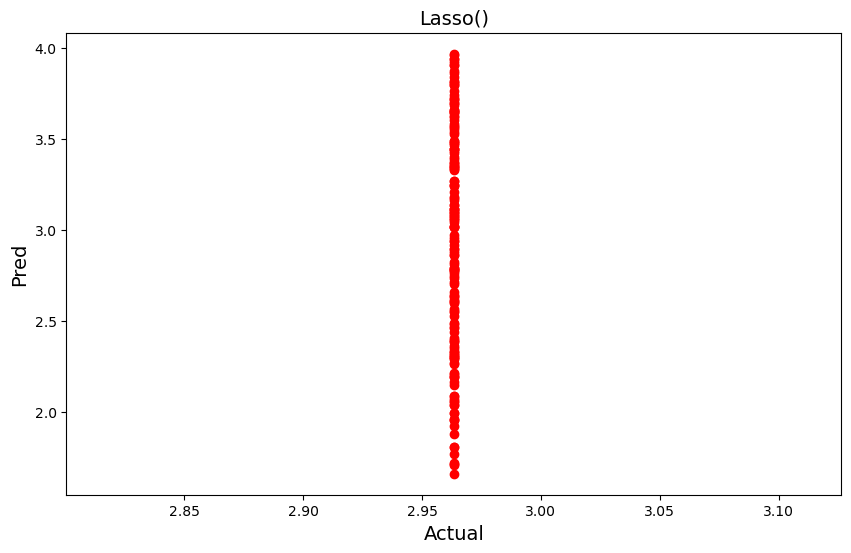

Cross Validation of:   Lasso()  is 
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Diff in Acc Score and Cross Val Score is -  0.6013874835529222


R2_score:   Ridge()  is  0.964575330830002
R2_score_Training Data:   Ridge()  is  91.39012103068383
error:
Mean Absolute error 0.08910889992551595
Mean Squared error 0.013654871668355295
Root Mean Squared error 0.11685406141146869


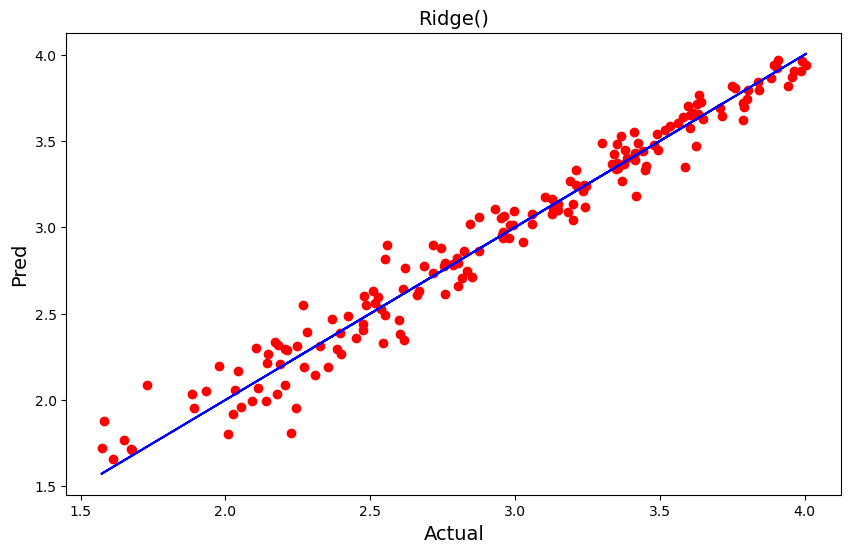

Cross Validation of:   Ridge()  is 
[0.89292168 0.93429658 0.90102969 0.94099039 0.84890717]
0.9036291005426632
Diff in Acc Score and Cross Val Score is -  6.094623028733881


R2_score:   SVR()  is  0.9721144817654247
R2_score_Training Data:   SVR()  is  96.06739452297576
error:
Mean Absolute error 0.07683844583277179
Mean Squared error 0.01074881380180095
Root Mean Squared error 0.10367648625315651


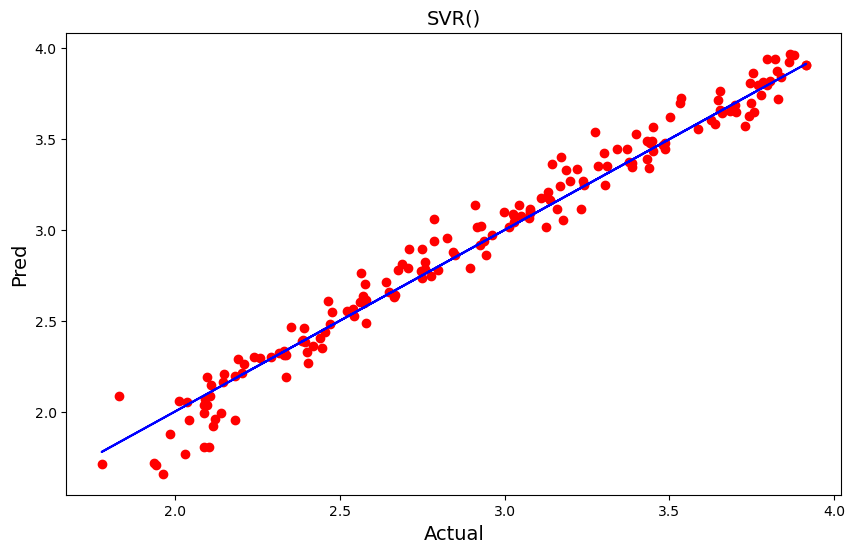

Cross Validation of:   SVR()  is 
[0.89656309 0.92627299 0.90977131 0.9411797  0.85204761]
0.9051669400105776
Diff in Acc Score and Cross Val Score is -  6.694754175484707


R2_score:   ExtraTreesRegressor()  is  0.9631837959381441
R2_score_Training Data:   ExtraTreesRegressor()  is  100.0
error:
Mean Absolute error 0.09068499999999995
Mean Squared error 0.014191255798837213
Root Mean Squared error 0.1191270573750448


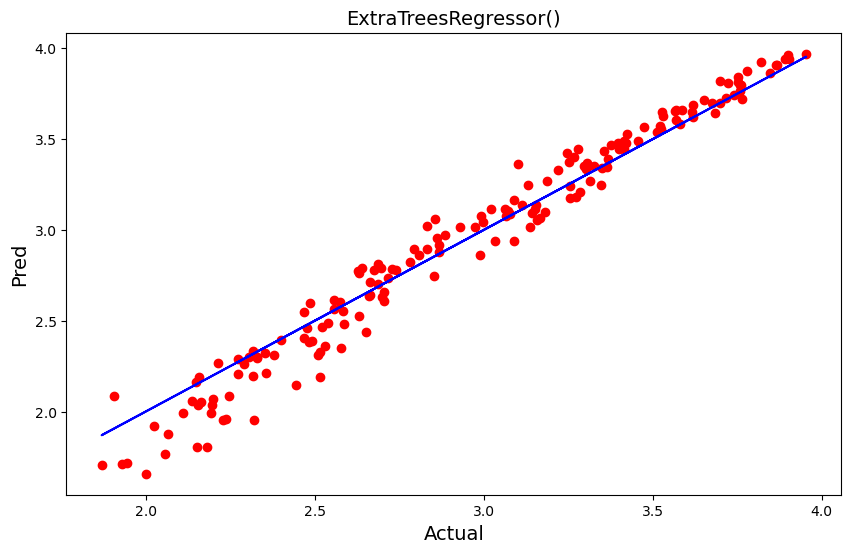

Cross Validation of:   ExtraTreesRegressor()  is 
[0.90984765 0.95721717 0.94831326 0.95173608 0.88165026]
0.9297528837818317
Diff in Acc Score and Cross Val Score is -  3.343091215631233




In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

ExtraTreesRegressor() is the best model 

# 5. Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "criterion": ["squared_error","absolute_error","friedman_mse","poisson"] ,     
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(ExtraTreesRegressor(),parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)




{'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
Final_model = ExtraTreesRegressor(criterion="absolute_error", max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

96.68391130093036
R2_score: 0.9668391130093036
Mean Absolute error 0.08686462209302319
Mean Squared error 0.012782269160901166
Root Mean Squared error 0.11305869785603037


# Saving the Model

In [204]:
import joblib # save as *.pkl
joblib.dump(reg_r,"Grades.pkl")

['Grades.pkl']